In [135]:
# Prueba de set 

import cv2 

# Establecer ruta de la imagen a probar 
img = cv2.imread('flores/tulipan/tulipan1322.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

26 26 3 3


In [136]:
# Importar librerías

import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [137]:
# Librerias para red neuronal 

import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

In [138]:
# Cargar set de imágenes 

import os
import re
import matplotlib.pyplot as plt

# Establecer nombre de la carpeta donde estan las subcarpetas de flores con sus imagenes
dirname = os.path.join(os.getcwd(),'flores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:\Users\Diego\Desktop\IA\reconocimiento_flores\flores\
c:\Users\Diego\Desktop\IA\reconocimiento_flores\flores\dipladenia 1


c:\Users\Diego\Desktop\IA\reconocimiento_flores\flores\flor_de_luna 4222
c:\Users\Diego\Desktop\IA\reconocimiento_flores\flores\nochebuena 3313
c:\Users\Diego\Desktop\IA\reconocimiento_flores\flores\tajonal 2166
c:\Users\Diego\Desktop\IA\reconocimiento_flores\flores\tulipan 3592
Directorios leidos: 5
Imagenes en cada directorio [4223, 3313, 2166, 3592, 4831]
suma Total de imagenes en subdirs: 18125


In [139]:
# Crear etiquetas 

labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  18125


In [140]:
# nombres de clases
# Las clases se llamaran igual que las subcarpetas 

flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 dipladenia
1 flor_de_luna
2 nochebuena
3 tajonal
4 tulipan


In [141]:
# clases

y = np.array(labels)
X = np.array(images, dtype=np.uint8)

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [142]:
# SETS de entrenamiento y TESTs, ver cantidad y  tamaño de las imagenes 

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (14500, 26, 26, 3) (14500,)
Testing data shape :  (3625, 26, 26, 3) (3625,)


Text(0.5, 1.0, 'Ground Truth : 0')

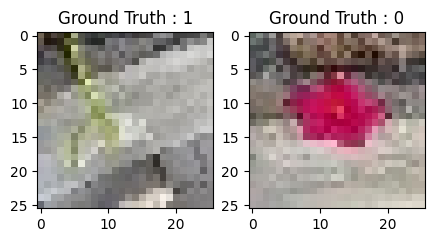

In [143]:
# Mostrar ejemplos 

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

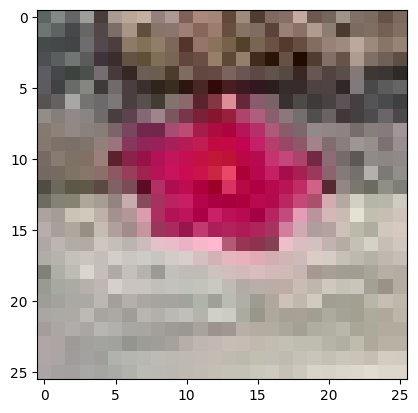

In [144]:
# Preprocesar imagenes 

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

In [145]:
# ONE HOT encoding para red neuronal , dejar todo igual

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


In [146]:
#Mezclar todo y crear los grupos de entrenamiento y testing, dejar todo igual 
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [147]:
#Ver tamaño y cantidad de datos 80 y 20

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(11600, 26, 26, 3) (2900, 26, 26, 3) (11600, 5) (2900, 5)


In [148]:
# Crear modelo de CNN 

#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 40 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [149]:
# colocar el nombre del modelo, en este caso es "flower_model"

flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(26,26,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [150]:
#Dejar igual

flower_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 32)                173088    
                                                      

In [151]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [152]:
## Entrenar el modelo para clasificar imágenes, establecer nombre de entrenamiento, aqui es flower_Train

flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/40
363/363 [==============================] - 8s 14ms/step - loss: 1.5594 - accuracy: 0.2880 - val_loss: 1.4365 - val_accuracy: 0.6072
Epoch 2/40
363/363 [==============================] - 4s 11ms/step - loss: 1.3947 - accuracy: 0.3982 - val_loss: 1.1873 - val_accuracy: 0.6862
Epoch 3/40
363/363 [==============================] - 4s 12ms/step - loss: 1.2097 - accuracy: 0.4938 - val_loss: 0.9901 - val_accuracy: 0.7179
Epoch 4/40
363/363 [==============================] - 4s 12ms/step - loss: 1.0503 - accuracy: 0.5712 - val_loss: 0.8225 - val_accuracy: 0.7845
Epoch 5/40
363/363 [==============================] - 4s 11ms/step - loss: 0.9259 - accuracy: 0.6306 - val_loss: 0.6848 - val_accuracy: 0.8400
Epoch 6/40
363/363 [==============================] - 4s 12ms/step - loss: 0.8159 - accuracy: 0.6887 - val_loss: 0.5641 - val_accuracy: 0.9059
Epoch 7/40
363/363 [==============================] - 5s 13ms/step - loss: 0.7233 - accuracy: 0.7370 - val_loss: 0.4748 - val_accuracy: 0.9224

In [153]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
# EStablecer ruta donde queremos guardar

flower_model.save("trained/flores1.h5")

c:\Users\Diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [154]:
# Evaluar la red naauronal 



test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

114/114 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9942


In [155]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])




Test loss: 0.04261763393878937
Test accuracy: 0.9942069053649902


In [156]:
flower_train.history




{'loss': [1.5593587160110474,
  1.394741177558899,
  1.2097278833389282,
  1.0502545833587646,
  0.9259352087974548,
  0.8159487247467041,
  0.7232919335365295,
  0.6434470415115356,
  0.5736859440803528,
  0.5193807482719421,
  0.4706583321094513,
  0.4267721176147461,
  0.39543357491493225,
  0.3650282025337219,
  0.346989244222641,
  0.32395344972610474,
  0.30275246500968933,
  0.287609726190567,
  0.270269513130188,
  0.2550094425678253,
  0.24557840824127197,
  0.23357516527175903,
  0.2287166267633438,
  0.22114384174346924,
  0.20822352170944214,
  0.1999339908361435,
  0.1927795559167862,
  0.1936686784029007,
  0.18905885517597198,
  0.17807918787002563,
  0.17748482525348663,
  0.1696719527244568,
  0.16336221992969513,
  0.15933384001255035,
  0.15717320144176483,
  0.1525944173336029,
  0.1461327224969864,
  0.14571671187877655,
  0.14043989777565002,
  0.13971994817256927],
 'accuracy': [0.28801724314689636,
  0.3981896638870239,
  0.4937931001186371,
  0.5712068676948547

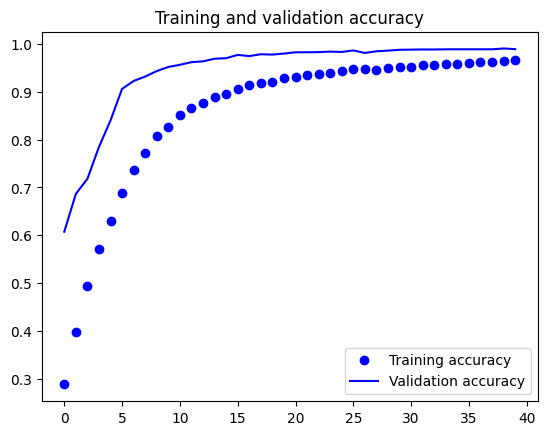

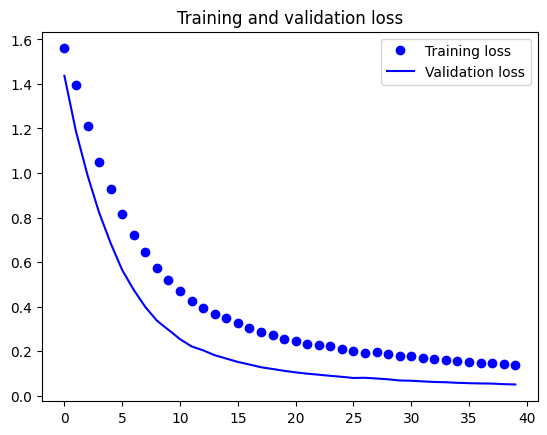

In [157]:
# Verificar tabla de datos 


accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss =flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [158]:
predicted_classes2 = flower_model.predict(test_X)

114/114 [==============================] - 0s 3ms/step


In [159]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [160]:
predicted_classes.shape, test_Y.shape

((3625,), (3625,))

Found 3604 correct labels


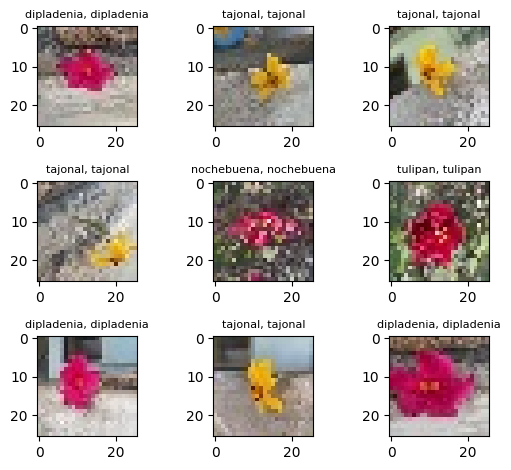

In [161]:
# Etiquetas correctas
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[correct].reshape(26, 26, 3), cmap='gray', interpolation='none')
    
    # Use fontsize parameter to set the text size
    plt.title("{}, {}".format(flores[predicted_classes[correct]], flores[test_Y[correct]]), fontsize=8)

    plt.tight_layout()

# Display the plot
plt.show()


Found 21 incorrect labels


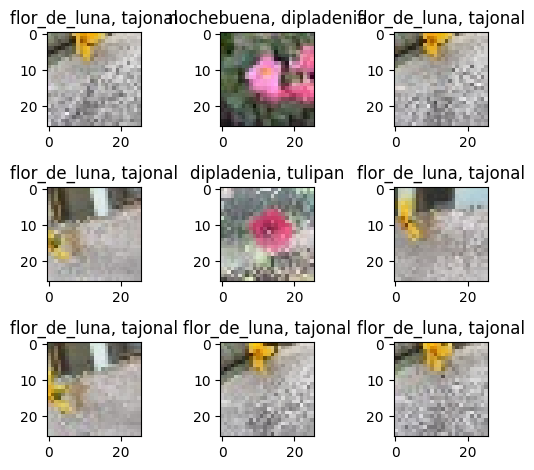

In [162]:
# Etiquetas incorrectas 

incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(26,26,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [163]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       841
     Class 1       0.99      1.00      0.99       663
     Class 2       0.99      1.00      0.99       442
     Class 3       1.00      0.98      0.99       675
     Class 4       1.00      0.99      0.99      1004

    accuracy                           0.99      3625
   macro avg       0.99      0.99      0.99      3625
weighted avg       0.99      0.99      0.99      3625



Found 3604 correct labels


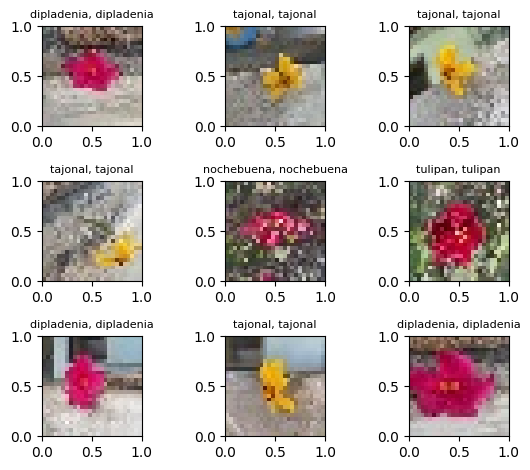

In [164]:
# Etiquetas correctas
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3, 3, i + 1)
    
    # Use extent to control the size of the displayed image
    plt.imshow(test_X[correct].reshape(26, 26, 3), cmap='gray', interpolation='none', extent=[0, 1, 0, 1])
    
    # Use fontsize parameter to set the text size
    plt.title("{}, {}".format(flores[predicted_classes[correct]], flores[test_Y[correct]]), fontsize=8)

    plt.tight_layout()

# Display the plot
plt.show()